<a href="https://colab.research.google.com/github/monicafar147/classification-predict-streamlit-template/blob/EDA/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports
##Importing the modules

In [23]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-deep')

from textblob import Word
from wordcloud import WordCloud, STOPWORDS

In [24]:
train = pd.read_csv("https://raw.githubusercontent.com/monicafar147/classification-predict-streamlit-template/master/climate-change-belief-analysis/train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/monicafar147/classification-predict-streamlit-template/master/climate-change-belief-analysis/test.csv")

In [25]:
print("Train\n")
print(train.head(5))
print("\nTest")
print(test.head(5))

Train

   sentiment                                            message  tweetid
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221
1          1  It's not like we lack evidence of anthropogeni...   126103
2          2  RT @RawStory: Researchers say we have three ye...   698562
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954

Test
                                             message  tweetid
0  Europe will now be looking to China to make su...   169760
1  Combine this with the polling of staffers re c...    35326
2  The scary, unimpeachable evidence that climate...   224985
3  @Karoli @morgfair @OsborneInk @dailykos \nPuti...   476263
4  RT @FakeWillMoore: 'Female orgasms cause globa...   872928


#EDA

First we make sure there are no repeats or Null values in the dataset

In [26]:
# Checking that there is no repeats in the Data

unique = [i for i in train['tweetid'].unique()]
print("Number of unique values")
print(train['tweetid'].nunique())
print("\nTotal number of values")
print(len(train['tweetid']))
print("\nNumber of null values:\n" + str(train.isnull().sum()))
print("\nThere are no repeats or Null values")

Number of unique values
15819

Total number of values
15819

Number of null values:
sentiment    0
message      0
tweetid      0
dtype: int64

There are no repeats or Null values


We now plot a graph of the sentiment columns distribution

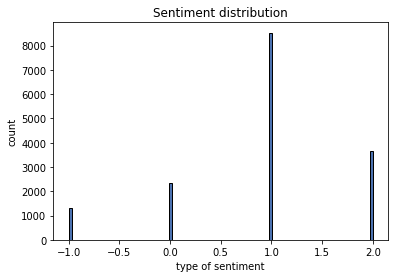

In [27]:
# We plot a graph to see the sentiment distribution
plt.hist(train['sentiment'], bins = 100, edgecolor = 'k')
plt.xlabel('type of sentiment')
plt.ylabel('count')
plt.title('Sentiment distribution')
plt.show()

Plotting a graph to show the tweet length distribution

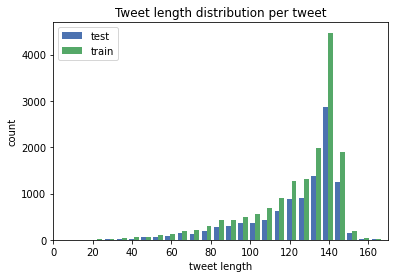

In [28]:
# Explore the word count and tweet lengths
train['length'] = train['message'].astype(str).apply(len)
train['word_count'] = train['message'].apply(lambda x: len(str(x).split()))
test['length'] = test['message'].astype(str).apply(len)
test['word_count'] = test['message'].apply(lambda x: len(str(x).split()))

# Creating the plot
plt.hist([test['length'], train['length']], bins=100, label=['test', 'train'])
plt.title('Tweet length distribution per tweet')
plt.xlabel('tweet length')
plt.ylabel('count')
plt.legend(loc='upper left')
plt.xlim([0,170])
plt.show()

**And now for the word length distribution**

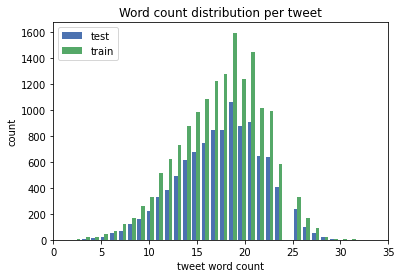

In [29]:
plt.hist([test['word_count'], train['word_count']], bins=100, label=['test', 'train'])
plt.title('Word count distribution per tweet')
plt.xlabel('tweet word count')
plt.ylabel('count')
plt.legend(loc='upper left')
plt.xlim([0,35])
plt.show()

So now we will create word clouds based on the two datasets to get insights into which words are the most common and hopefully being able to better understand how the model works

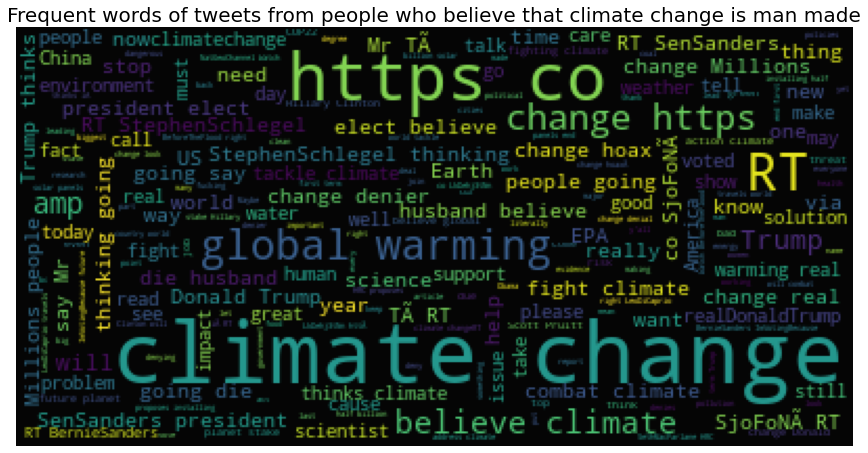

In [30]:
# Creating the word cloud
rnd_comments = train[train['sentiment']==1].sample(n=2000)['message'].values
wc = WordCloud(background_color='black', max_words=2000, stopwords=STOPWORDS)
wc.generate(''.join(rnd_comments))
# Plotting the word cloud
plt.figure(figsize=(15,10))
plt.axis('off')
plt.title('Frequent words of tweets from people who believe that climate change is man made', fontsize=20)
plt.imshow(wc.recolor(colormap='viridis', random_state=17), alpha=0.98)
plt.show()

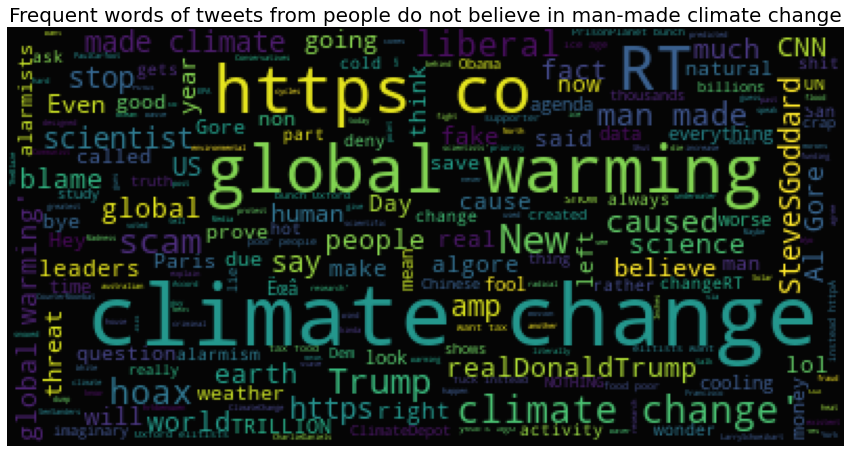

In [31]:
# Creating the word cloud
rnd_comment = train[train['sentiment']==-1].sample(n=200)['message'].values
wc = WordCloud(background_color='black', max_words=2000, stopwords=STOPWORDS)
wc.generate(''.join(rnd_comment))

#plotting the word cloud
plt.figure(figsize=(15,10))
plt.axis('off')
plt.title('Frequent words of tweets from people do not believe in man-made climate change', fontsize=20)
plt.imshow(wc.recolor(colormap='viridis', random_state=17), alpha=0.98)
plt.show()

**These are the most common Hashtags and @Users in the train dataset**

In [32]:
# Anti
anti = train[train['sentiment']==-1]
a_tweets = anti['message']
series_a = a_tweets.str.extractall(r'(\#\w+)')[0].value_counts()

# Pro
pro = train[train['sentiment']==1]
p_tweets = pro['message']
series_p = p_tweets.str.extractall(r'(\#\w+)')[0].value_counts()

print("\033[1mAnti Climate change most common hashtags\033[0m\n" + str(series_a))
print("\n")
print("\033[1mPro Climate change most common hashtags\033[0m\n" + str(series_p))

Anti Climate change most common hashtags
#MAGA                           11
#climate                        10
#Trump                           7
#climatechange                   6
#ParisAgreement                  4
                                ..
#miamibeachbowl                  1
#antisemitic                     1
#a                               1
#ableg                           1
#ConfessYourUnpopularOpinion     1
Name: 0, Length: 178, dtype: int64


Pro Climate change most common hashtags
#climate               187
#BeforeTheFlood        129
#climatechange          94
#ImVotingBecause        62
#COP22                  59
                      ... 
#multitask               1
#MyWishForTheFuture      1
#CPC                     1
#MAYWARDSkrengg          1
#KeystoneXL              1
Name: 0, Length: 1255, dtype: int64


**Now we do the same thing but with the @ to see these tweets are mostly directed at**

In [33]:
#Anti
anti = train[train['sentiment']==-1]
tweets_a = anti['message']
series_a = tweets_a.str.extractall(r'(\@\w+)')[0].value_counts()

# Pro
pro = train[train['sentiment']==1]
tweets_p = pro['message']
series_p = tweets_p.str.extractall(r'(\@\w+)')[0].value_counts()

print("\033[1mAnti Climate change most common tweets\033[0m\n" + str(series_a))
print("\n")
print("\033[1mPro Climate change most common tweets\033[0m\n" + str(series_p))


Anti Climate change most common tweets
@realDonaldTrump    71
@SteveSGoddard      44
@PrisonPlanet       20
@CounterMoonbat     16
@FoxNews            11
                    ..
@DougWil71           1
@LiberalLogic123     1
@Marie35396768       1
@CamaryAllen         1
@MaryCass95          1
Name: 0, Length: 920, dtype: int64


Pro Climate change most common tweets
@StephenSchlegel    307
@SenSanders         245
@realDonaldTrump    164
@LeoDiCaprio        129
@BernieSanders      123
                   ... 
@femaIes              1
@JaneMayerNYer        1
@12Balboa             1
@LeoHickman           1
@ManMadeMoon          1
Name: 0, Length: 4504, dtype: int64


from this alone we can see that people who belive in climate change tend to tweet with alot more hashtags

In [34]:
rts = [0]
op =[]
for i in train['message']:
  if 'RT' in i:
    rts.append(i)
  else:
    op.append(i)

print("Number of Original Tweets: " + str(len(op)))
print("\nNumber of Retweets: " + str(len(rts)))
print("\nRatio of Orignal Tweets to retweets: " + str(round(len(op)/len(rts),2)))

Number of Original Tweets: 6133

Number of Retweets: 9687

Ratio of Orignal Tweets to retweets: 0.63


We can see by this that there are alot more retweets in the data so this might have duplicate rows but if we get rid of them this will very sorely impact the number of data points we have to train, and the more the merrier